In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '2024.csv'  # Specify the correct path to your dataset
data = pd.read_csv(file_path)

# Preprocessing steps:
# One-hot encode the 'Country' column (convert categorical data into numerical)
data_encoded = pd.get_dummies(data, columns=['Country'])

# Normalizing the numerical columns ('Gold', 'Silver', 'Bronze', 'Total Medals')
scaler = MinMaxScaler()
features_to_normalize = ['Gold', 'Silver', 'Bronze', 'Total Medals']
data_encoded[features_to_normalize] = scaler.fit_transform(data_encoded[features_to_normalize])

# Defining the feature set (X) and target variable (y)
X = data_encoded.drop(columns=['Total Medals'])  # Features excluding the target
y = data_encoded['Total Medals']  # Target variable (Total Medals)

# Splitting the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 0.0058457107885190865
R-squared (R2): 0.8992264777014817


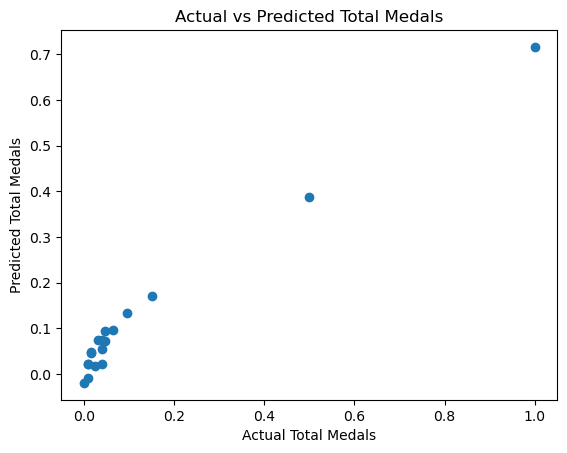

In [7]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Total Medals')
plt.ylabel('Predicted Total Medals')
plt.title('Actual vs Predicted Total Medals')
plt.show()


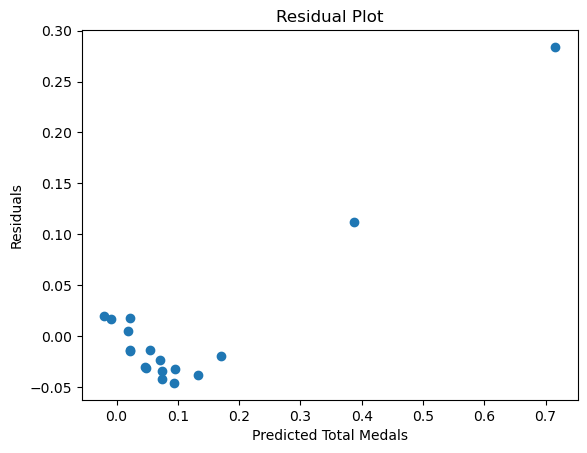

In [9]:
# Residual plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Total Medals')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [13]:
# Predict on the training data
y_train_pred = model.predict(X_train)

# Predict on the test data (already done previously)
y_test_pred = model.predict(X_test)

# Training metrics
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Testing metrics
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Output the evaluation metrics
print(f"Training Mean Squared Error (MSE): {mse_train}")
print(f"Training R-squared (R2): {r2_train}")

print(f"Testing Mean Squared Error (MSE): {mse_test}")
print(f"Testing R-squared (R2): {r2_test}")


Training Mean Squared Error (MSE): 8.477254680627575e-28
Training R-squared (R2): 1.0
Testing Mean Squared Error (MSE): 0.0058457107885190865
Testing R-squared (R2): 0.8992264777014817
